Chapter 6: 3D Surfaces
======================

Most of our graphs so far in this book have been plots of one quantity
versus another quantity, or in the case of parametric plots, two
coordinates that depend on a single third parameter. These are called
two dimensional (2D) plots, because they involve two variables. The
exceptions were plots that included extra information such as errors,
which were indicated in various ways. In this chapter, we enter into the
world of three-dimensional surface plots. These are visualizations of an
independent variable, usually called “z”, that depends on two
independent variables, “x” and “y”. The value of z is represented by the
height of a surface in three dimensions, projected, of course, onto the
plane of the paper or screen (although gnuplot can plot to a huge array
of output devices, the current version does not yet include a 3D printer
terminal). Along with the height of the projected surface, the value of
z may also be represented by color, and the shape of the surface may be
made more apparent by the use of simulated illumination. The surface may
also be colored to indicate a second independent variable, in which case
we have a type of 4D plot (the amplitude and phase of a complex
function, for example).

Three dimensional surface plots, and the relationships they illustrate,
are quite common and useful. Some examples are equations of state (for
example, plotting pressure vs. temperature and density), all sorts of
weather data (air temperature vs. latitude and longitude), and even
actual height, such as in a topographic map.

We can also make parametric plots in 3D, which can take the form of a
path through space or of a (potentially quite complex) surface,
depending on whether we use one or two parameters.

Wireframe Surfaces with `splot`
-------------------------------

The `splot`, or surface plot, command, is our basic tool for making 3D
plots. As we shall soon see, it can do more than plot surfaces, but that
is where we start.

First, a note about sampling. As you probably recall, you can change the
sampling rate of a plotted function in a 2D plot by `set samples`. This
also works in 3D, but you can specify a different number of samples in
the x and y directions, if you wish, by providing two numbers (if you
provide only one, gnuplot will use it for both directions). But there
are two other numbers you must be aware of when drawing 3D surfaces.
Gnuplot builds the surface by drawing a set of *isolines* at right
angles to each other, parallel to the x and y axes. The `samples` are
taken along each isoline, but you can also control the number of
isolines; the command is `set isoline x, y`, where `isolines` can be
abbreviated to, for instance, `iso`. The default is only 10 isolines,
which is usually too coarse to be useful, so you will nearly always want
to increase that. The tradeoff is slower plotting and a slower response
to interactive rotation and scaling. Because different values for
`isolines` and `samples` can have unexpected effects when we build more
complex 3D plots, it’s a good rule of thumb to set them all the same,
unless you have a specific reason for doing otherwise.

In [ ]:
set iso 60
set samp 60
unset key
set title "J_0(r^2)"
set xrange [-4:4]
set yrange [-4:4]
set ztics 0.5
set view 30, 55
splot besj0(x**2 + y**2)

The View
--------

Since 3D plots are projections of an imaginary 3D object, it can be
viewed from different angles. This is controlled by the `set view`
command, which, in its simplest version, takes two numbers, the first
for the rotation about the x axis, the second around z, in degrees (the
x-rotation is performed first). It can be difficult to determine what is
the most useful view for a particular plot without seeing it and
experimenting; therefore, even if our final product is intended to be a
file, a common workflow is to first create the plot using an interactive
terminal (x11 or wxt). Then we can rotate the plot with the mouse until
we find the best view. We can now reset the terminal to the final output
device that we need, specify the output file, and simply say `replot`.
The current view settings are available by typing `show view`, and a
subset is displayed in the plot window.

In [ ]:
set iso 60
set samp 60
unset key
set title "J_0(r^2)"
set xrange [-4:4]
set yrange [-4:4]
set ztics 0.5
set view 90, 45
splot besj0(x**2 + y**2)

Hidden Line Removal
-------------------

Our plots so far in this chapter are essentially wireframes that we can
see through. We can also render the surface as opaque, by simply adding
a single command, highlighted in the script below. Gnuplot will also,
unless plotting in monochrome, draw the two sides of the surface in
contrasting colors. Gnuplot makes the surface appear opaque by removing
from the plot any part of the surface, other surfaces, and other plot
elements (such as the axes and tic labels) that are behind the surface
from our point of view. The name of the setting refers to this technique
of *hidden line removal*. When making hidden line plots, the `sample`
setting has no effect; the surface resolution is controlled solely by
the number of isolines.

In [ ]:
set iso 100
set hidden3d
unset key
set title "J_0(r^2)"
set xrange [-4:4]
set yrange [-4:4]
set ztics 0.5
set view 105, 150
splot besj0(x**2 + y**2)

Styling the Isolines
--------------------

The isolines making up a surface can be styled freely, just as in 2D
plotting. You can even ask for dashed lines, if you dare. But when line
properties are chosen while `hidden3d` is set, the top-and-bottom
distinction that gnuplot, by default, draws during hidden line removal
is not performed: both sides of the surface will follow your settings.

In [ ]:
set iso 30
set view 110, 45
set hidd
set xr [-1 : 1]
set yr [-1 : 1]
splot exp(-(x**2 + y**2)*5) w lines lc "green" lw 3

Wireframe Surfaces with Variable Coloring
-----------------------------------------

We can color the lines forming the wireframe surface according to the
z-value, providing an extra visual cue to help convey the shape of the
function or data being visualized. This works with or without hidden
line removal. If you are plotting a data file or using the “++”
filename, you can take the color value from the third column or from a
fourth column in the `using` command. When using `splot`, a palette is
always active, so it can be used to color the isolines.

In [ ]:
set iso 50; set samp 50
set view 50,30
set hidd
set xr [-1 : 1]
set yr [-1 : 1]
splot exp(-(x**2 + y**2)*5) lc pal lw 2

Setting Top and Bottom Styles
-----------------------------

When `splot`ting a function while `hidden3d` is set, gnuplot [will
draw](#hidden-line-removal) the “top” and “bottom” of the surface in
different colors. You can set the isoline color and thickness, as in the
previous examples, but then you will get the same line style on both
sides of the surface. This section explains how to set line properties
for the top and bottom to the colors and thickness that you want (the
colors can be set as you wish, but both sides will be rendered with the
same line thickness: the one set for the top). Gnuplot chooses the line
properties from the existing *linetypes*. Each terminal has a series of
predefined linetypes, that you can see by giving the command
[`test`](#test). When using color, these are, by default, some sequence
of colors, at thickness 1. When switching to `set monochrome`, some of
the lines may turn into dash patterns, but gnuplot will not select these
for the surface, just using black lines in this case. The program will
draw the top of the first surface using linetype 1, the bottom (by
default) linetype 2, the top of the second surface with linetype 3, etc.
To change the color and thickness used for the isolines, redefine the
properties of the linetypes, as in the example below. You can also, or
instead, give the command `set hidden offset n`, which will increase the
linetype index between front and back to n.

In [ ]:
set view 120, 30
unset key
set hidd
set iso 30
set lt 1 lc "seagreen" lw 3
splot exp(-(x**2 + y**2)/10)

Solid Surfaces
--------------

Using hidden line removal turns our wireframe plots into a
solid-appearing surface. The numerical value encoded into the surface’s
height can be visually estimated by the rendering of the perspective in
conjunction with the tics on the vertical axis. But gnuplot can also
indicate the z value by coloring the surface (not merely the lines
forming the wireframe), which makes it easier to interpret. Use the
`pm3d` plotting style for this; it has many options, which we’ll explore
below, but simply invoking it does much of what we want.

The `pm3d` style began as an independent enhancement to gnuplot, and was
eventually absorbed into the main program. This history results in a
certain awkwardness in its use. Although the syntax treats `pm3d` as a
setting for `splot`, and the `splot` command must be invoked to use it,
it’s really a separate surface drawing routine. For this reason, when
making the more complex plots that we’ll visit later in this chapter,
it’s helpful to adhere to certain combinations of settings and rules of
thumb, to avoid unexpected results. Here is a script that plots our
Bessel function as an opaque surface, colored according to its value:

In [ ]:
set iso 100
unset key
set xrange [-4:4]; set yrange [-4:4]
set ztics 0.5
set view 40, 60
splot besj0(x**2 + y**2) with pm3d

Solid Surfaces with Lines
-------------------------

`pm3d` surfaces are constructed by defining a set of quadrilaterals and
coloring each one with an average value that represents the function or
data in that quadrilateral. Sometimes the surface can be better
visualized if the borders of these quadrilaterals are shown clearly.
Here is a script that does just that:

In [ ]:
set iso 40
set pm3d border lw 1
unset key
set xrange [-4:4]; set yrange [-4:4]
set ztics 0.5
set view 40, 60
splot besj0(x**2 + y**2) lc "white" with pm3d

Palettes
--------

The previous `pm3d` plots have used gnuplot’s default color *palette*, a
typical rainbow spectrum. The palette is the sequence of colors that are
mapped onto z values; it can be set to anything you like, in several
different ways. For the vast majority of cases, one simple method for
defining the palette will be sufficient; if your needs are more
specialized, you can ask gnuplot for the details by typing
`help palette`. First, a monochrome palette can be activated by a simple
command, shown below (just saying `set monochrome`, as before, will not
redefine the palette). Let’s give our friend the Bessel function a rest,
and rest, and reproduce the plot used on the cover of this book:

In [ ]:
set pal grey
set iso 100
unset xtics
unset ytics
unset ztics
unset key
unset border
set xr [0.06:1]
set yr [0.06:1]
set view 66,28
splot 1/x**3 + 200*sin(30*y) + 1900*exp((-(x-.6)**2-(y-.6)**2)/.04)\
   with pm3d

Palette Definitions
-------------------

One option for creating a range of colors other than the default, or the
greyscale palette, is to use what gnuplot calls a *palette definition*.
This is a set of colors, specified using RGB values or color names,
where each color is associated with a number from 0 to 1; these numbers
represent the full range of the *colorbox*. The colorbox range, like the
z axis, by default covers the actual range of values being plotted; but,
also like the axes, it can be set to any values using the command
`set cbrange [a : b]`. For example, the number 0 in the palette
definition means the beginning of the `cbrange`, 0.5 is exactly halfway
from the beginning to the end, and 1 is the maximum value. The palette
is constructed by linearly interpolating between the values you specify
in the definition. To illustrate the syntax of this command, some
examples: the greyscale palette could be built with (using some
abbreviations) `set pal def (0 "black", 1 "white)`. Here’s the above
script with another example:

In [ ]:
set pal def (0 "blue", 0.5 "red", 1 "white")
set iso 100
unset xtics
unset ytics
unset ztics
unset key
unset border
set xr [0.06:1]
set yr [0.06:1]
set view 66,28
splot 1/x**3 + 200*sin(30*y) + 1900*exp((-(x-.6)**2-(y-.6)**2)/.04)\
   with pm3d

Palette Discontinuities
-----------------------

Sometimes when visualizing data or a mathematical function we are
interested in highlighting a particular value; or data above and below a
certain value may have different significance. If we can place a sharp
break in the otherwise smooth color gradients in the palette used to
color our surface, that can supply the needed emphasis. To do this using
the `set pal def` command, repeat a number in the list, supplying a
different color each time. The example below inserts a single
discontinuity in the palette, but you can have as many as needed:

In [ ]:
set pal def (0 "black", 0.5 "blue", 0.5 "red", 1 "white")
set iso 100
unset xtics
unset ytics
unset ztics
unset key
unset border
set xr [0.06:1]
set yr [0.06:1]
set view 66,28
splot 1/x**3 + 200*sin(30*y) + 1900*exp((-(x-.6)**2-(y-.6)**2)/.04)\
   with pm3d

Good and Bad Color Palettes
---------------------------

Many commonly used color palettes seen in presentations and papers, and
the default palettes in many plotting programs, are bad choices for
scientific visualization, or any presentation of data that aims to be
accurate and versatile. They are inaccurate because bright areas in the
palettes can create the impression of features in the data that are not
really there; and they lack versatility because they don’t appear
properly when printed in monochrome, and because they create
difficulties for those with [defects in color vision](#colorsequence).
Naively constructed palettes using the techniques described above are
likely to share these defects; they may be useful in research and
exploration, or for creating purely illustrative graphics, but should be
avoided in the publication of real data. Fortunately, researchers have
devised palettes that avoid all these difficulties. Gnuplot has a
convenient way to make use of one type of improved palette, the
[cubehelix](https://www.mrao.cam.ac.uk/~dag/CUBEHELIX/). Cubehelix
palettes take into account the fact that human vision is more sensitive
to some colors than others; the palette increases monotonically in
perceived intensity while cycling through the colors. When printed in
monochrome, a cubehelix palette maintains a smooth increase in
brightness; the color sequence is also friendly to readers who may have
one of several types of color vision defects. The gnuplot implementation
allows you to pick the starting color, expressed as an angle on the
color wheel, the number of cycles to take through the color wheel, and
the overall saturation. It is affected by another setting we haven’t yet
discussed, changed by `set palette gamma`, as is the [greyscale
palette](#greyscalepallet), but you shouldn’t have to worry about this
setting unless you need to color match between output devices. Cubehelix
palettes are excellent choices for data visualizations in science,
engineering, and any technical field where accurate interpretation is
the aim.

Cubehelix Palettes
------------------

The new command in the script below is the cubehelix option to the
`set palette` command. The first argument is the starting angle on the
color wheel in radians; the second is the number of times through the
color wheel (negative to go “backwards”); and the last is the overall
saturation.

In [ ]:
set iso 500
set palette cubehelix start 0 cycles -1. saturation 1
splot exp(-(x**2 + y**2)*.04) with pm3d

Cubehelix Stripes
-----------------

If you specify a large number of “cycles” in the cubehelix palette
setup, you will be effectively be drawing contours on the surface, while
maintaining the overall indication of magnitude through apparent
brightness. Gnuplot can plot actual contours on surfaces, which we’ll
get to in a later chapter, but this is another way to get a similar
effect. We’ll use this example to show how to do something else, too:
change the color of the plot background. This can be useful when using
these types of palettes, which end on near-white colors, to create more
contrast between the plotted surface and the background, which is
normally white also. The command to do this creates an `object`, which
is a concept that we’ll also explore in depth in a future chapter. The
background color can also be changed with a terminal option, but this
doesn’t work in all terminals.

In [ ]:
set iso 500
set palette cubehelix start pi/2 cycles -15. saturation 1
set object 1 rectangle from screen 0,0 to screen 1,1\
   fillcolor rgb "aquamarine" behind
splot exp(-(x**2 + y**2)*.04) with pm3d

3D Data
-------

Of course, gnuplot can make 3D plots of data, as well as functions. To
understand the format of the standard gnuplot 3D data file, remember
that gnuplot constructs surfaces out of sets of intersecting isolines.
Each isoline plots the value along one coordinate while the other one is
held constant (iso means “same”). In the data file, there are three
columns, for x, y, z, arranged into “blocks” separated by a blank line.
Each block makes one isoline holding x constant and varying y; after
gnuplot calculates all of these lines, it then calculates the
intersecting isolines. If the data is on a regular grid, the x and y
values can be omitted. This is the standard format, but gnuplot can
handle others, as well; type `help splot` and choose the `data`
subsection for the details. Note that the `isolines` and `samples`
settings have no effect when plotting data. This example uses the file
“3dsample.dat”, which you can find in the publisher’s book download
area. Examination should clarify the structure that gnuplot expects to
see in its standard 3D data file.

In [ ]:
unset key
set palette cubehelix start pi/2 cycles -1 saturation 1
set cbr [0 : 1.5]
splot "3dsample.dat" with pm3d

The Special Filename “++”
-------------------------

You may recall that you can use the [special filename
“+”](#plus-filename) to plot functions while pretending that you are
plotting data, so that you can use the features of the `using` command.
The 3D version of this is the “++” special filename, and it works the
same way. In the `splot` command below, the columns \$1 and \$2 refer to
the x and y coordinates, respectively; the command is the same as saying
`splot sin(x)*cos(y)`: Starting in gnuplot v. 5.2, sampling and ranges
are along the u and v axes, rather than the x and y axes, when using ++,
so you can set the size of the box and the plot range independently. If
you are using an older version, change the `ur` and `vr` setting to `xr`
and `yr`.

In [ ]:
set ur [0 : pi]
set yr [0 : pi]
set hidden
set iso 50
splot "++" using 1:2:(sin($2)*cos($1)) with lines

Multiple Surfaces
-----------------

You can plot multiple surfaces as easily as [multiple
curves](#plotting-multiple-curves). Here we’ll plot a function of two
variables along with an intersecting plane of dots, the latter plotted
using the “++” special file. The example shows one reason you may want
to plot with “++”: it allows you all the options that come with the
`using` command, including skipping points with the `every` subcommand.
In 3D, the `every` subcommand accepts two numbers separated by a colon,
to set the skip in each direction. We’ve used that here to plot a smooth
function surface with 40 isolines, along with an intersecting coarser
array of large dots.

In [ ]:
set ur [0 : 10]
set vr [0 : 10]
set hidden
set view 65, 30
set iso 40; set samp 40
splot "++" u 1:2:(1) every 4:4 pt 7 ps 3 lc "grey",\
   10*cos(y/3.)*sin(x/3.)

Combining a pm3d with a Mesh Surface
------------------------------------

You can draw any number of possibly intersecting surfaces of different
types in gnuplot, but you must take care to apply the right settings to
cause them to be rendered correctly. We’ll show how to do that with pm3d
surfaces [below](#depthorder). Here is an example of a mesh surface
intersecting a pm3d surface. You must apply the `hidden3d front` setting
for this type of plot, or the surfaces will not be drawn correctly.
Leaving `hidden3d` unset, or doing `set hidd` without the `front`
setting, will probably not be sufficient. If you want to be able to see
the mesh surface *through* the pm3d surface, you must turn hidden line
drawing off with `unset hidd` (the default), as well as setting a
[transparent fill](#transparent-pm3d-surfaces). A mesh surface drawn
with hidden line removal can not be seen through any pm3d surface.

In [ ]:
set iso 50
set hidd front
set xr [-1 : 1]
set yr [-1 : 1]
splot (exp(-(x**2 + y**2)*3)) with pm3d,\
  (x**2+y**2) with lines

Lighting
--------

You can add a simulation of directional lighting to your surfaces, which
makes their shape more apparent to the eye. The gnuplot command
`set pm3d lighting primary A specular B` adds the lighting effect, with
A and B both numbers from 0 to 1, giving the fractional intensity of
each component. The primary light is a diffuse, directional
illumination, while the specular component supplies shiny highlights.
You usually need to experiment to find the best values for a particular
surface. Here we’ve used the [animation procedure](#animations) from the
previous chapter to make a movie of a surface rotating in 3D. This kind
of animation is very effective at making the shape of a solid object
clear, especially when combined with directional lighting. As
[before](#animations), you must stitch the generated frames together
using Imagemagick or another program that can make movies out of a
sequence of images.

``` gmm
set term pngcairo
unset key
set cbr[-60:100]
set yr [0:10]; set xr [0:10]
set iso 100
set pm3d lighting primary .2 specular .5
do for [i = 1:200] {
  set view 35, 360.*i/200
  set out  gprintf("frame%03.0f.png", i)
  splot besj0(y)*x**2 with pm3d }
set out
```

Parametric Plots in 3D: Paths in Space
--------------------------------------

We can make parametric plots in 3D as well as [in
2D](#parametric-plots). In 3D there are two types: if we use one
parameter, we get a curve drawn in the 3D space, while if we use two, we
get a surface, as we’ll see in the next section. It is more difficult to
mentally visualize the results of a parametric plot command than the
ones we’ve seen up to now; you must imagine the parameter\[s\]
increasing, and what happens to the x and y coordinates. Here’s an
example of a cone-shaped helix:

In [ ]:
unset key
set parametric
set samp 1000
set view 60, 45
set urange [0 : 10]
splot u*cos(10*u), u*sin(10*u), u lw 3

Parametric Plots in 3D: Surfaces
--------------------------------

Using two parameters, we can draw all manner of complex shapes in 3D. As
we’ve mentioned, it can be difficult to understand how a given
expression leads to the shape you see on the screen; but if you imagine
one parameter held fixed while the other evolves, and the path that
would be traced out in space, and do this for a succession of fixed
values of the first parameter, you may achieve enlightenment. In the
`splot` command below, the parameters are u and v, and the three
expressions are the x, y, and z components of the surface, which slices
through itself in 3D. The resolution of parametric surface plots depends
on the `samples` settings, and only the first number is used. The
`set isolines` settings has no effect on the surface, but does have a
side effect on auto-generation of ticks and axes ranges. Similar
considerations apply to the parametric lines in 3D of the previous
section. The `depthorder` setting does for pm3d surfaces what `hidden3d`
does for mesh surfaces, and is absolutely necessary for correct
rendering of any complicated pm3d plot.

In [ ]:
unset key
set parametric
set pm3d depthorder
set samp 100
unset border
set view 45, 80
unset xtics; unset ytics; unset ztics
set urange [-pi:pi]
set vrange [-pi:pi]
splot cos(u)*cos(v), sin(u)*cos(v), sin(u) with pm3d

Transparent `pm3d` Surfaces
---------------------------

The colored surfaces created by the pm3d style are normally opaque,
regardless of the `hidden3d` setting. But the facet coloring follows the
global `fill` setting; therefore the pm3d surface can be rendered
translucent, which can help in the visualization of complex shapes. Note
that the `depthorder` option is not compatible with the transparent fill
option, but you can influence the order in which the surface components
are drawn: try `help pm3d scan`.

In [ ]:
unset key
set parametric
set style fill transparent solid .5
set samp 100
unset border
set view 45, 80
unset xtics; unset ytics; unset ztics
set urange [-pi:pi]
set vrange [-pi:pi]
splot cos(u)*cos(v), sin(u)*cos(v), sin(u) with pm3d

Plot Borders in 3D
------------------

We [know how to](#controlling-your-borders) control which of the four
possible border lines are drawn for a 2D plot. In 3D, there are 12
border lines to choose from, and each one can be turned on or off at
will. Here is the table of 12 magic numbers; for each border that you
desire, add the corresponding number to the total, and supply the result
to the `set border` command. The default is equivalent to 31, which, as
you’ve seen, gives you all four lines at the base and one “left
vertical” line. The example in the next section adds up all the numbers
for a complete box around the plot.

               1   bottom left front
               2   bottom left back
               4   bottom right front
               8   bottom right back
              16   left vertical
              32   back vertical
              64   right vertical
             128   front vertical
             256   top left back
             512   top right back
            1024   top left front
            2048   top right front

Coordinate Mapping
------------------

Gnuplot does not offer polar (cylindrical, spherical) coordinate systems
in 3D when plotting functions, but when plotting data, either from a
file or using the “++” special filename, the columns can be mapped to a
cylindrical (θ, z, r) or spherical (θ, φ, r) coordinate system. Angles
are in radians unless set otherwise (`set angle degrees`), and, if the
third column is omitted, r = 1. Here is a plot of two concentric cones.
Their colors are taken from a fourth column supplied with the `u`
command; since the palette will be rescaled to cover the range of z
values, any two values could be used in the fourth columns, and the
endpoints of the defined palette would be selected. We’ve used different
ranges for the plot and the box, as explain [above](#plusplus).

In [ ]:
set mapping cylindrical
set iso 100
set ur [-pi : pi]
set vr [-pi : pi]
set xr [-1.5*pi : 1.5*pi]
set yr [-1.5*pi : 1.5*pi]
set zr [0 : 1]
set cbr [0 : 1]
set pm3d lighting primary .4 specular .6
set style fill transparent solid .2
set border 4095
unset colorbox; unset key
set pal def (0 "blue", 1 "red")
splot "++" u 1:2:($2):(0) w pm3d,\
   "++" u 1:2:(2*$2):(1) w pm3d

The Bottom of the Box
---------------------

The floor, or x-y plane, in 3D plots can be positioned at will. You may
have noticed that it is placed, by default, somewhat below the smallest
z-value, which usually helps with viewing these plots in perspective.
But we often want to put it somewhere else, and that somewhere else is
often (but not always) at, or very close to, the minimum z-value. This
script repeats the previous plot, but with the floor of the box touching
the point of the cone. The new command that does this is highlighted.
This example also shows how to get pm3d surfaces with a single color.

In [ ]:
set mapping cylindrical
set iso 100
set ur [-pi : pi]
set vr [-pi : pi]
set xr [-1.5*pi : 1.5*pi]
set yr [-1.5*pi : 1.5*pi]
set zr [0 : 1]
set style fill transparent solid .2
set border 4095
unset colorbox; unset key
set xyplane at 0
set view 77, 38
splot "++" u 1:2:($2) w pm3d fc "blue"

Grids in 3D
-----------

None of the 3D plots in this chapter have grids. Unlike 2D in gnuplot,
that is the default. Here we repeat the previous plot, showing how to
turn on the grid. Without further instructions, gnuplot puts the grid on
the x-y plane only.

In [ ]:
set mapping cylindrical
set iso 100
set ur [-pi : pi]
set vr [-pi : pi]
set zr [0 : 1]
set style fill transparent solid .2
set border 4095
set grid lt -1 lc "#339999"
unset colorbox; unset key
set xlabel "x"
set ylabel "y"
set zlabel "z"
set xyplane at 0
set view 77, 38
splot "++" u 1:2:($2) w pm3d fc "blue"

Grid Control in 3D
------------------

Gnuplot allows us complete control of which gridlines appear on what
planes. The default, as we saw above, are x- and y- grids on the z-y
plane, and nowhere else. Any more specific grid command replaces this
default with what we ask for. If we say `set grid ztics`, we get
gridlines on the vertical planes, because that is where the z values
change. The command (only in 3D, and new in v. 5.4) `set grid vertical`
extends any x- or y- gridlines that you have asked for onto the vertical
planes; without this command, they are drawn on the bottom plane only.
Here are some examples, which repeat the previous plot, but with all the
grid commands used displayed as a title. To get these results, you will
need to reset or say `unset grid` between plots, as some of the grid
commands add gridlines to previous commands.

°

°

°

<figure>
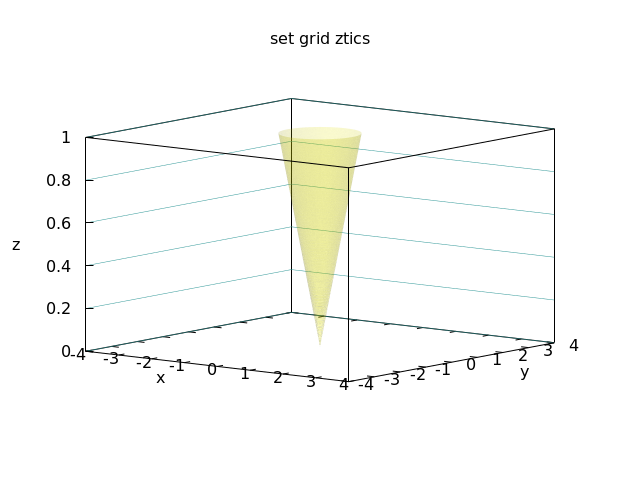<figcaption aria-hidden="true">°</figcaption>
</figure>

<figure>
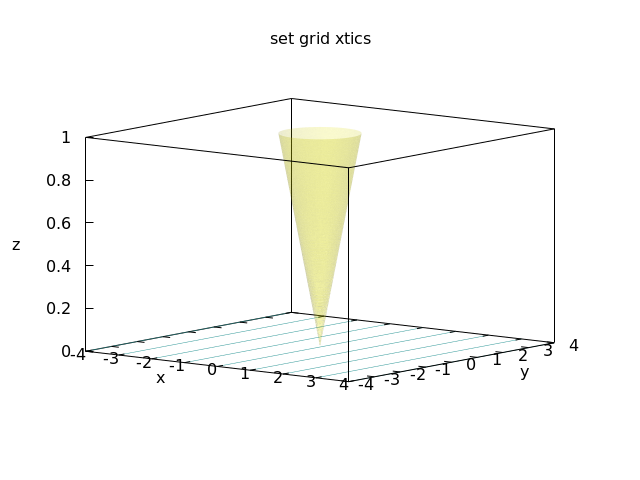<figcaption aria-hidden="true">°</figcaption>
</figure>

<figure>
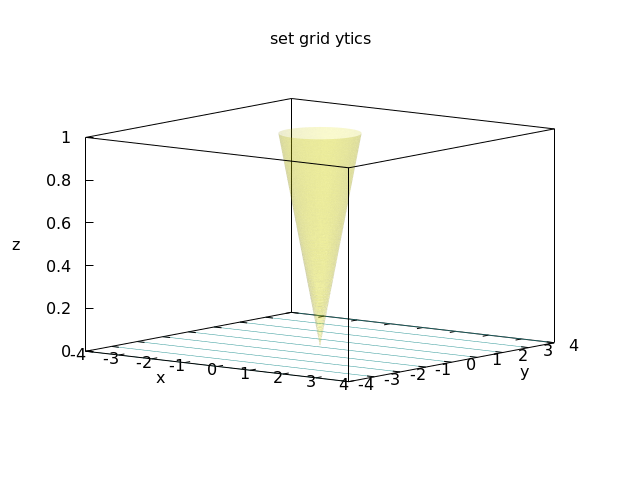<figcaption aria-hidden="true">°</figcaption>
</figure>

<figure>
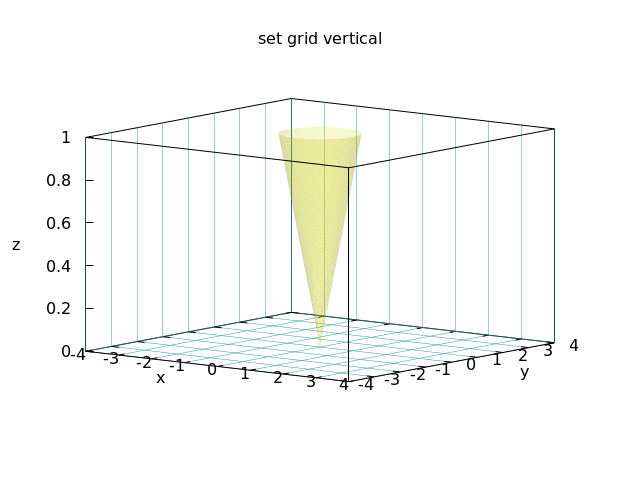<figcaption aria-hidden="true">°</figcaption>
</figure>

<figure>
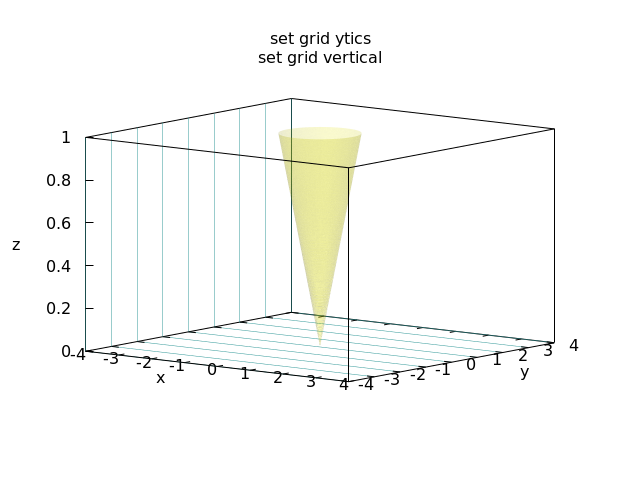<figcaption aria-hidden="true">°</figcaption>
</figure>

<figure>
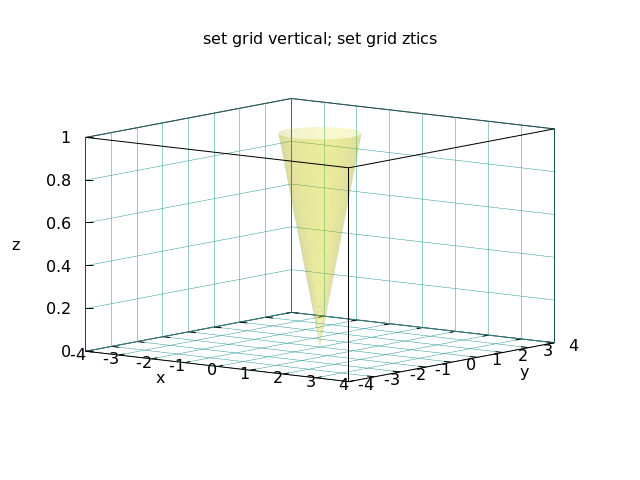<figcaption aria-hidden="true">°</figcaption>
</figure>

Walls
-----

The `set walls` command will create solid walls for 3D plots at x, y,
and z = 0 with, by default, opacity = 1/2. Walls work best if you also
[change the default position of the bottom
plane](#the-bottom-of-the-box).

In [ ]:
set mapping cylindrical
set walls
set xyplane at 0
set iso 100
set ur [-pi : pi]
set vr [-pi : pi]
set zr [0 : 1]
set style fill transparent solid .2
set border 4095
unset colorbox; unset key
unset xtics; unset ytics; unset ztics
splot "++" u 1:2:($2) w pm3d fc "blue"

If you want more detailed control, you can set the characteristics of
the three individual walls. Sample commands for each wall are
highlighted in the following script.

In [ ]:
set mapping cylindrical
set wall z0 fillstyle solid fc "green"
set wall x0 fillstyle transparent solid 0.3 fc "blue"
set wall y0 fillstyle transparent solid 0.3 fc "red"
set xlab "x"
set ylab "y"
set xyplane at 0
set iso 100
set ur [-pi : pi]
set vr [-pi : pi]
set zr [0 : 1]
set style fill transparent solid .3
set border 4095
unset colorbox; unset key
unset xtics; unset ytics; unset ztics
splot "++" u 1:2:($2) w pm3d fc "blue"

4D Plots
--------

If we use the color and height of the surface to represent different
quantities, then we have what is essentially a 4-dimensional plot: two
dependent and two independent variables. One common use for such plots
is to visualize functions of a complex variable. The gnuplot syntax for
complex numbers is `{a, b}`, which means a + ib, where i<sup>2</sup> =
-1. The gnuplot functions `real`, `imag`, and `abs` all do what you
would expect when supplied with a complex argument. One common way to
visualize complex functions is to represent their magnitude as the
height of a surface, with the surface colored to show the phase angle of
the function value in the complex plane. Here is an example that uses
this type of plot to display the sine function of a complex argument.
This example also shows how to position and size the colorbox, and how
to give it a title, which can take an [offset](#offset) just like axis
labels.

In [ ]:
set view 45,120
unset key
set iso 100
set xr [-2*pi : 2*pi]
set yr [-pi : pi]
set xlab "x"
set ylab "y"
set title "Sine(x + iy)" font "Courier,20"
set colorbox horiz user origin .58,.78 size .35,.03
set cblab "Phase angle" font "Courier, 18" offset 0, 4.2
f(x,y) = sin(x + y*{0,1})
set pal def (0 "blue", .5 "red", .5 "green", 1 "orange")
splot "++" u 1:2:(abs(f($1,$2))):\
   (atan(real(f($1,$2))/imag(f($1,$2)))) with pm3d

Settings for Surfaces
---------------------

Now that we’ve seen examples of gnuplot’s different types of surfaces,
we’ll pause here to explain the effects of the various settings on what
gnuplot actually does. This is not always clear from the official
documentation or the help system. If you use the examples in this book
as starting points, you’ll be able to get the effect you want with the
usual modification of the scripts; nevertheless, it can be useful to
understand, more systematically, what the various options do, and that’s
what this section is all about.

The basic mesh surface, a wireframe that you can see through, is
produced with the `splot` command with no other options. The number of
“wires”, or isolines, is controlled by the `set iso` command, and the
number of samples along each isoline is controlled by `set samples`. If
the values for samples and isolines are very different the results can
appear odd.

When you `splot` after turning on hidden line removal with
`set hidden3d`, a different plotting algorithm is used. Now
`set samples` has no effect; the surface resolution is determined only
by the number of isolines. Without hidden line removal (`unset hidd` or
the default), when plotting functions, the function value is calculated
at each sample point along the isolines; but with `hidden3d` on, it is
calculated at each isoline intersection; consequently, at low
resolutions the surfaces generated with and without hidden line removal
can have a somewhat different shape. This is another reason it may be
wise to routinely set the isoline and sampling resolution to the same
values.

When you `splot ... with pm3d`, isolines are drawn similarly (but not
identically) as when you omit the `with pm3d` phrase: this means that
the isolines are influenced by the `hidden3d` setting. Then each facet
of the surface, the small areas bounded by the isolines, is colored
according to the average of the values at its bounding isoline
intersections. Whether you can see through this surface or not depends
on the `fill` setting, as we just saw, and not on the `hidden3d`
setting. But that setting *does* affect the appearance of the pm3d
surface if the values set by `set isolines` and `set samples` are not
equal. (The online help claims that the `hidden3d` setting has no effect
upon pm3d surfaces, but this is just in regard to their apparent
opacity.) If the surface is at all complex, you must execute
`set pm3d depthorder`; failing to set this will result in incorrect
surfaces, especially with intricate parametric plots.

You will encounter many examples, in the official demos, on websites,
and even this author’s previous gnuplot book, where a script will say
`set pm3d`, making a global setting to use pm3d surfaces for all `splot`
commands. Other versions are `set pm3d on s`, or `set pm3d on sb`, to
draw pm3d surfaces on the surface, or on both the surface and the
*bottom* (we’ll see what this is for in a later chapter). With this
setting made, you merely have to say `splot ...` to create a pm3d
surface, without having to add `with pm3d`. These commands put gnuplot
in “pm3d implicit” mode, where pm3d will be activated for all surfaces.
However, in this case the `splot` command also plots isolines along with
the pm3d surface, as if you had commanded
`plot f(x,y) w pm3d, f(x,y) w lines`. Sometimes this doesn’t matter.
But, as we said above, the isolines for the two styles of surface
drawing do not exactly coincide; this means that there may be weird
artifacts, especially in areas with large curvature, where there are
gaps between the two surfaces.
The figure shows a typical example; it was created with `set pm3d`
followed by a simple `splot` command. To avoid these problems and
others, avoid putting pm3d in implicit mode, by never saying
`set pm3d at s`, etc. You can make other pm3d settings, such as
`set pm3d border ...`, which leaves pm3d in *explicit* mode. In this way
you can freely mix different styles of surface by using different styles
(`splot f(x,y) with pm3d, g(x,y) with lines`) without any surprises.
(Actually, you can avoid surprises if you’re careful to always specify
`with pm3d` or `with lines`; the danger of plotting multiple surfaces
only crops up when you omit the style specifier.)

(There is another flag called `surface` that is on by default: it tells
gnuplot to actually draw a surface when executing a `splot` command; at
times we might need to say `unset surface`, as we’ll see in later
chapters. But here is another example of how combinations of settings
can lead to surprises when putting pm3d in implicit mode: After
`unset surface` and `set pm3d` (making pm3d implicit), a `splot` command
shows the axes through the surface if hidden3d is turned on, but not if
it is turned off.)

Axis Labels in 3D
-----------------

The default treatment of axis labels when using `splot` is to print them
horizontally, which takes up a lot of space, and is not usually what you
want:

In [ ]:
unset key; unset colorbox
set border 4095
set lmargin 9
set xlab "The x-axis" 
set ylab "The y-axis"
set zlab "The z-axis" offset -3
set samp 200; set iso 200
set zr [-2 : 2]
set xr [-5 : 5]
set yr [-5 : 5]
set map spher
splot "++" u 1:2 w pm3d

Gnuplot offers a convenience to help with this, in the form of a keyword
that can only be used for axis labels when using `splot`. This is
highlighted below:

In [ ]:
unset key; unset colorbox
set border 4095
set lmargin 9
set xlab "The x-axis" rot parallel
set ylab "The y-axis" rot parallel
set zlab "The z-axis" rot parallel
#set grid ztics lt 3
#set grid ytics
set samp 200
set iso 200
set zr [-2 : 2]
set xr [-5 : 5]
set yr [-5 : 5]
set map spher
splot "++" u 1:2 w pm3d